#### Vedant Sunil Deshpande
#### M13748683
#### deshpavl
#### BANA 8090 - Intro to Python - Final Project

For this project, I have sourced 2 files on World Happiness Report. 
One file contains survey data from the Feb 26, 2021 release of the Gallup World Poll
(GWP) covering years from 2005 to 2020.
Another file has similar data for the year 2021.
The files have lot of indexes and parameters regarding Happiness Scores but we will pick few which are common in both the files. The parameters to be used for analysis are Ladder Score, GDP per capita, Social Support, Life Expectancy and Generosity. Each of these columns have been discussed in detail later in the notebook.

In 2020, Covid-19 hit the entire world. Each country suffered at varying magnitudes, and the recovery too is different for different countries. But one thing is sure, we would always talk in terms of pre-covid and post-covid times.
Hence, the file with data for years 2005-2020 will be used to determine pre-covid indexes, and these will then be compared to the ones from 2021 (post-covid). 
This will give us an idea on how various countries are hit by Covid, how they are recovering and eventually list worst hit and least hit countries. 

Though all the countries face some form of diaster, natural calamity or an unfortunate event, the impact is mostly local and hardly at a national/international level. But the current pandemic is one such once in a century event which has impacted countries at large. Hence, we would average out the happiness indexes for countries in the years 2005-2020, and compare the average value with that of 2021.

Both datasets have slightly different column names. As part of pre-processing, these will be made same (in Jupyter, as part of the code) and the datasets would be combined on the 'Country' column. Few countries are part of only one file, those rows will be deleted since we need 2 entities for comparison. 

In [1]:
# Importing required packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gs

In [2]:
# Importing datasets

pre = pd.read_csv("world-happiness-report.csv")
post = pd.read_csv("world-happiness-report-2021.csv")

In [3]:
# Keeping required columns

pre = pre[["Country name", "Life Ladder", "Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Generosity"]]
post = post[["Country name", "Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Generosity"]]

In [4]:
# Renaming columns in both datasets to make them consistent

pre = pre.rename(columns={"Country name":"Country","Life Ladder":"Ladder Score","Log GDP per capita":"GDP per capita","Healthy life expectancy at birth":"Life Expectancy"})
post = post.rename(columns={"Country name":"Country","Ladder score":"Ladder Score","Logged GDP per capita":"GDP per capita","Healthy life expectancy":"Life Expectancy"})

In [5]:
# Count unique number of countries in both datsets

count_pre = 0
country_pre = []
for i in range(len(pre["Country"])):
    if pre["Country"][i] not in country_pre:
        country_pre.append(pre["Country"][i])
        count_pre += 1
print(("No. of unique countries in pre: ", str(count_pre)))

count_post = 0
country_post = []
for i in range(len(post["Country"])):
    if post["Country"][i] not in country_post:
        country_post.append(post["Country"][i])
        count_post += 1
print(("No. of unique countries in post: ", str(count_post)))

('No. of unique countries in pre: ', '166')
('No. of unique countries in post: ', '149')


In [6]:
# Deleting rows for countries present in pre but not in post

pre = pre[pre.Country.isin(post.Country)]

In [7]:
# Reset index to account for dropped rows

pre = pre.reset_index(drop=True)

In [8]:
# Count unique number of countries in both datsets after deletion of missing countries

count_pre = 0
country_pre = []
for i in range(len(pre["Country"])):
    if pre["Country"][i] not in country_pre:
        country_pre.append(pre["Country"][i])
        count_pre += 1
print(("No. of unique countries in pre: ", str(count_pre)))

count_post = 0
country_post = []
for i in range(len(post["Country"])):
    if post["Country"][i] not in country_post:
        country_post.append(post["Country"][i])
        count_post += 1
print(("No. of unique countries in post: ", str(count_post)))

('No. of unique countries in pre: ', '149')
('No. of unique countries in post: ', '149')


In [9]:
# Check if both the datasets have same structure

print(pre.head())
print(post.head())

       Country  Ladder Score  GDP per capita  Social support  Life Expectancy  \
0  Afghanistan         3.724           7.370           0.451            50.80   
1  Afghanistan         4.402           7.540           0.552            51.20   
2  Afghanistan         4.758           7.647           0.539            51.60   
3  Afghanistan         3.832           7.620           0.521            51.92   
4  Afghanistan         3.783           7.705           0.521            52.24   

   Generosity  
0       0.168  
1       0.190  
2       0.121  
3       0.162  
4       0.236  
       Country  Ladder Score  GDP per capita  Social support  Life Expectancy  \
0      Finland         7.842          10.775           0.954             72.0   
1      Denmark         7.620          10.933           0.954             72.7   
2  Switzerland         7.571          11.117           0.942             74.4   
3      Iceland         7.554          10.878           0.983             73.0   
4  Netherlan

#### A bit about the columns

##### Ladder Score: Imagine a ladder with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom represents the worst possible life. 
##### GDP per capita: GDP is the Gross Domestic Product for each country. This divided by the total population gives GDP per capita. Since GDP data is not available for 2021, it is forecasted in this dataset. The calculation also takes into account population forecast to calculate GDP per capita.
##### Social Support: It is the national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
##### Life Expectancy: Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository (Last updated: 2020-09-28). The data at the source are available for the years 2000, 2005, 2010, 2015 and 2016. To match this report’s sample period (2005-2020), interpolation and extrapolation are used.
##### Generosity: It is the national average of response to the GWP question “Have you donated money to a charity in the past month or willing to donate?”

In [10]:
# Averaging values in the pre-covid dataset
# These will be used to compare against 2021 values

pre = pre.groupby(["Country"]).mean()
print(pre.head())

             Ladder Score  GDP per capita  Social support  Life Expectancy  \
Country                                                                      
Afghanistan      3.594667        7.650833        0.508417        52.266667   
Albania          5.019385        9.384385        0.716231        67.546154   
Algeria          5.389875        9.328875        0.803571        65.290000   
Argentina        6.310133       10.033800        0.904400        67.900000   
Armenia          4.513571        9.270357        0.718571        65.742857   

             Generosity  
Country                  
Afghanistan    0.070083  
Albania       -0.082692  
Algeria       -0.144333  
Argentina     -0.159867  
Armenia       -0.199643  


In [11]:
pre = pre.reset_index()
pre.head()

,Country,Ladder Score,GDP per capita,Social support,Life Expectancy,Generosity
0,Afghanistan,3.594667,7.650833,0.508417,52.266667,0.070083
1,Albania,5.019385,9.384385,0.716231,67.546154,-0.082692
2,Algeria,5.389875,9.328875,0.803571,65.290000,-0.144333
3,Argentina,6.310133,10.033800,0.904400,67.900000,-0.159867
4,Armenia,4.513571,9.270357,0.718571,65.742857,-0.199643


In [12]:
# Check for null values in both datasets

print(pre.isnull().sum())
print(post.isnull().sum())

Country            0
Ladder Score       0
GDP per capita     1
Social support     0
Life Expectancy    3
Generosity         1
dtype: int64
Country            0
Ladder Score       0
GDP per capita     0
Social support     0
Life Expectancy    0
Generosity         0
dtype: int64


In [13]:
# Drop rows with null values

pre = pre.dropna(how='any', axis=0)
len(pre)

146

In [14]:
# Drop the same countries from 'post' dataset

post = post[post.Country.isin(pre.Country)]

In [15]:
# Reset index to account for dropped records

pre = pre.reset_index(drop=True)
post = post.reset_index(drop=True)

In [16]:
# Count unique number of countries in both datsets after deletion of missing countries

count_pre = 0
country_pre = []
for i in range(len(pre["Country"])):
    if pre["Country"][i] not in country_pre:
        country_pre.append(pre["Country"][i])
        count_pre += 1
print(("No. of unique countries in pre: ", str(count_pre)))

count_post = 0
country_post = []
for i in range(len(post["Country"])):
    if post["Country"][i] not in country_post:
        country_post.append(post["Country"][i])
        count_post += 1
print(("No. of unique countries in post: ", str(count_post)))

('No. of unique countries in pre: ', '146')
('No. of unique countries in post: ', '146')


Since both the datasets will be compared based on Country, we will be merging the datasets on 'Country' column.
Column names will be suffixed as '_pre' and '_post' for the pre-covid and post-covid dataset respectively

In [17]:
# Merge both datasets on the column 'Country'

final = pre.merge(post, on="Country", suffixes=("_pre","_post"))
final.head()

,Country,Ladder Score_pre,GDP per capita_pre,Social support_pre,Life Expectancy_pre,Generosity_pre,Ladder Score_post,GDP per capita_post,Social support_post,Life Expectancy_post,Generosity_post
0,Afghanistan,3.594667,7.650833,0.508417,52.266667,0.070083,2.523,7.695,0.463,52.493,-0.102
1,Albania,5.019385,9.384385,0.716231,67.546154,-0.082692,5.117,9.520,0.697,68.999,-0.030
2,Algeria,5.389875,9.328875,0.803571,65.290000,-0.144333,4.887,9.342,0.802,66.005,-0.067
3,Argentina,6.310133,10.033800,0.904400,67.900000,-0.159867,5.929,9.962,0.898,69.000,-0.182
4,Armenia,4.513571,9.270357,0.718571,65.742857,-0.199643,5.283,9.487,0.799,67.055,-0.168


In [18]:
# Ensure all the countries have found a match. Dataset 'final' should have same number of rows as pre and post dataset

print('No. of countries in final dataset after the merge: ', str(len(final)))

No. of countries in final dataset after the merge:  146


No. of countries in pre = No. countries in post = No. of countries in merged dataset = 146

In [19]:
# Calculate difference for all parameters (post - pre)

final["Ladder Score"] = final["Ladder Score_post"] - final["Ladder Score_pre"]
final["GDP per capita"] = final["GDP per capita_post"] - final["GDP per capita_pre"]
final["Social support"] = final["Social support_post"] - final["Social support_pre"]
final["Generosity"] = final["Generosity_post"] - final["Generosity_pre"]
final['Life Expectancy'] = final["Life Expectancy_post"] - final["Life Expectancy_pre"]

In [20]:
final.head()

,Country,Ladder Score_pre,GDP per capita_pre,Social support_pre,Life Expectancy_pre,Generosity_pre,Ladder Score_post,GDP per capita_post,Social support_post,Life Expectancy_post,Generosity_post,Ladder Score,GDP per capita,Social support,Generosity,Life Expectancy
0,Afghanistan,3.594667,7.650833,0.508417,52.266667,0.070083,2.523,7.695,0.463,52.493,-0.102,-1.071667,0.044167,-0.045417,-0.172083,0.226333
1,Albania,5.019385,9.384385,0.716231,67.546154,-0.082692,5.117,9.520,0.697,68.999,-0.030,0.097615,0.135615,-0.019231,0.052692,1.452846
2,Algeria,5.389875,9.328875,0.803571,65.290000,-0.144333,4.887,9.342,0.802,66.005,-0.067,-0.502875,0.013125,-0.001571,0.077333,0.715000
3,Argentina,6.310133,10.033800,0.904400,67.900000,-0.159867,5.929,9.962,0.898,69.000,-0.182,-0.381133,-0.071800,-0.006400,-0.022133,1.100000
4,Armenia,4.513571,9.270357,0.718571,65.742857,-0.199643,5.283,9.487,0.799,67.055,-0.168,0.769429,0.216643,0.080429,0.031643,1.312143


In [21]:
# Colors to be used in plots

low_c = '#dd4124'
high_c = '#009473'

In [22]:
# Sorting pre-covid dataset based on happiest and unhappiest countries

hap = final.groupby('Country')['Ladder Score_pre'].mean().sort_values(ascending=False)[:10]
unhap = final.groupby('Country')['Ladder Score_pre'].mean().sort_values(ascending=True)[:10]
top_bottom = hap.append(unhap, ignore_index=False).sort_values(ascending=True)

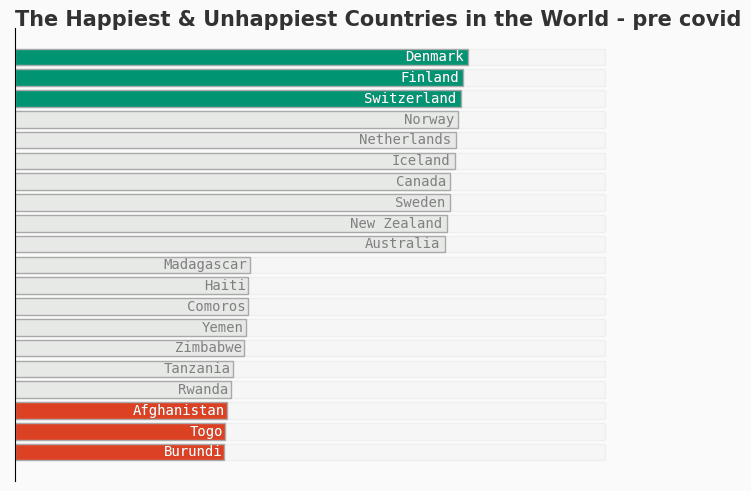

In [23]:
fig = plt.figure(figsize=(8,6),dpi=100)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])


background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 


# Plots 
# Happiest
data = top_bottom

color_map = ['#e7e9e7' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] =  low_c # color highlight
color_map[17] = color_map[18] = color_map[19] =  high_c 
#base
ax0.barh(data.index, 10, 
       edgecolor='darkgray',color='lightgray',alpha=0.1)
# actual
ax0.barh(data.index, data, 
       edgecolor='darkgray',color=color_map)


for i in range(0,20):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=10, color='gray',rotation=0)
# diff color text
for i in range(0,3):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=10, color='white',rotation=0)

for i in range(17,20):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=10, color='white',rotation=0)
    
    
# ax labels off

ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])


# Remove border from plot

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
ax0.text(0,20.5,'The Happiest & Unhappiest Countries in the World - pre covid',fontfamily='sans-serif',fontsize=15,fontweight='bold',color='#323232')

plt.show()

In [24]:
# Sorting post-covid dataset based on happiest and unhappiest countries

hap_post = final.groupby('Country')['Ladder Score_post'].mean().sort_values(ascending=False)[:10]
unhap_post = final.groupby('Country')['Ladder Score_post'].mean().sort_values(ascending=True)[:10]
top_bottom_post = hap_post.append(unhap_post, ignore_index=False).sort_values(ascending=True)

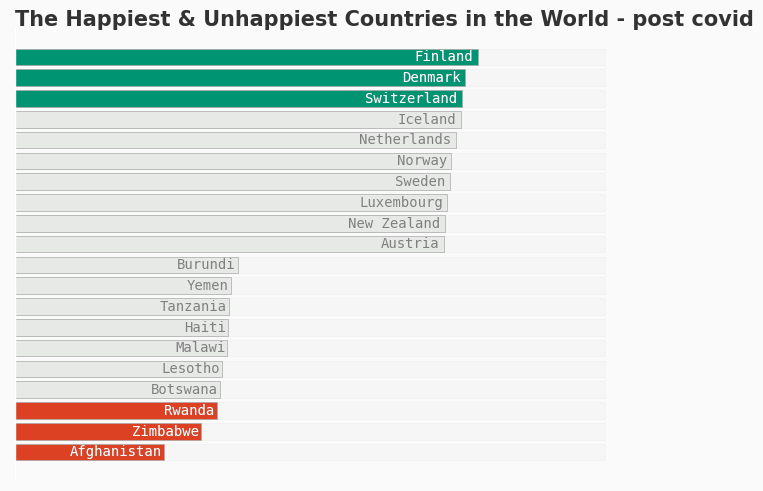

In [25]:
fig = plt.figure(figsize=(8,6),dpi=100)
plt.style.use('ggplot')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])


background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 


# Plots 
# Happiest
data = top_bottom_post

color_map = ['#e7e9e7' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] =  low_c # color highlight
color_map[17] = color_map[18] = color_map[19] =  high_c 
#base
ax0.barh(data.index, 10, 
       edgecolor='darkgray',color='lightgray',alpha=0.1)
# actual
ax0.barh(data.index, data, 
       edgecolor='darkgray',color=color_map)


for i in range(0,20):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=10, color='gray',rotation=0)
# diff color text
for i in range(0,3):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=10, color='white',rotation=0)

for i in range(17,20):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=10, color='white',rotation=0)
    
    
# ax labels off

ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])


# Remove border from plot

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
ax0.text(0,20.5,'The Happiest & Unhappiest Countries in the World - post covid',fontfamily='sans-serif',fontsize=15,fontweight='bold',color='#323232')

plt.show()

As can be seen from the above 2 plots, the happiest and unhappiest countries pretty much remains the same with few movements within top 10 and bottom 10.

In [26]:
#Colors to be used in the plots

color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]

Text(8.5, -0.05, 'There is a difference in mean between the Asian countries and EU/American countries')

findfont: Font family ['San'] not found. Falling back to DejaVu Sans.


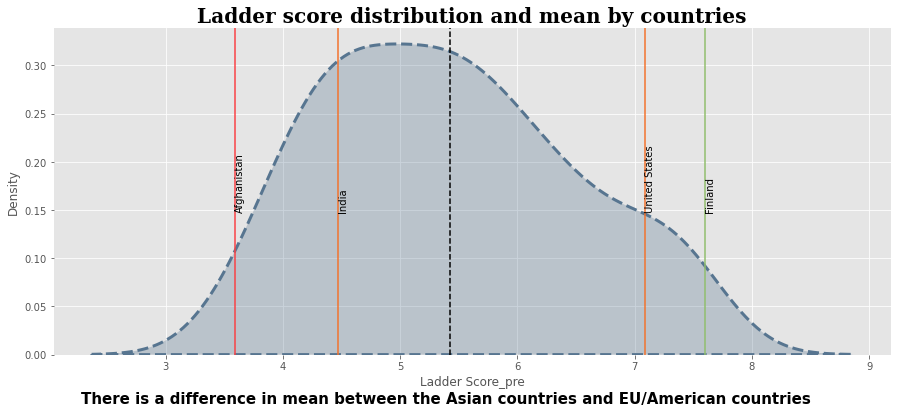

In [27]:
fig=plt.figure(figsize=(15,6))
plt.style.use('ggplot')
plt.title("Ladder score distribution and mean by countries",family='Serif', weight='bold', size=20)
sns.kdeplot(final['Ladder Score_pre'],color=color[-1], shade=True, linewidth=3, ls='--', alpha=0.3)
plt.axvline(final['Ladder Score_pre'].mean(), c='black',ls='--')
plt.axvline(final[final['Country']=='Finland']['Ladder Score_pre'].mean(), c=color[4])
plt.text(x=final[final['Country']=='Finland']['Ladder Score_pre'].mean(), y=0.15, s='Finland', rotation=90)
plt.axvline(final[final['Country']=='Afghanistan']['Ladder Score_pre'].mean(), c=color[0])
plt.text(x=final[final['Country']=='Afghanistan']['Ladder Score_pre'].mean(), y=0.15, s='Afghanistan', rotation=90)
plt.axvline(final[final['Country']=='India']['Ladder Score_pre'].mean(), c=color[1])
plt.text(x=final[final['Country']=='India']['Ladder Score_pre'].mean(), y=0.15, s='India', rotation=90)
plt.axvline(final[final['Country']=='United States']['Ladder Score_pre'].mean(), c=color[1])
plt.text(x=final[final['Country']=='United States']['Ladder Score_pre'].mean(), y=0.15, s='United States', rotation=90)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)
plt.text(x=8.5,y=-0.05, s="There is a difference in mean between the Asian countries and EU/American countries", ha='right', family='San', size=15, weight='bold')

European and North American countries have a better Ladder Score as compared to Asian and African countries

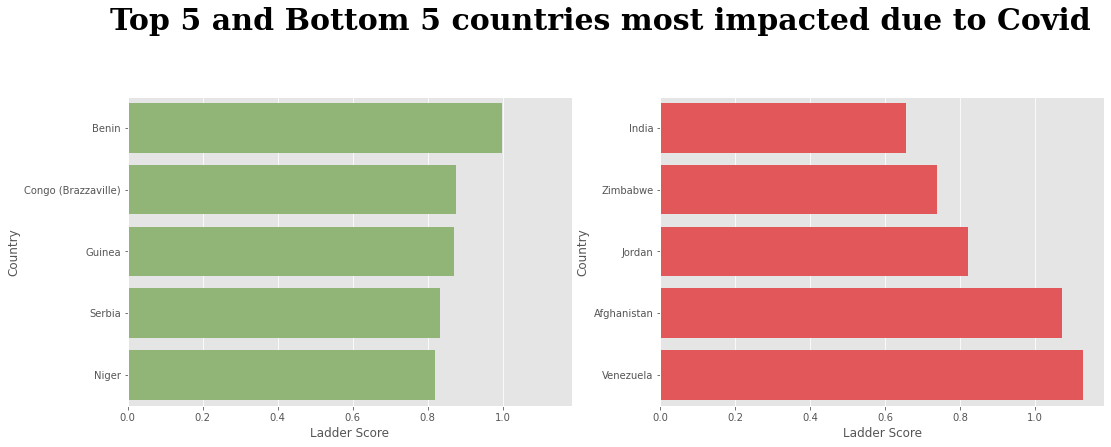

In [28]:
# Top 5 and bottom 5 countries most impacted (delta Ladder Score)
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.gridspec as gs

fig= plt.figure(figsize=(17.5,12.5))
g=gs.GridSpec(ncols=2, nrows=2, figure=fig)
plt.suptitle("Top 5 and Bottom 5 countries most impacted due to Covid", family='Serif', weight='bold', size=30)
ax1=plt.subplot(g[0,0])

data = final.sort_values("Ladder Score", ascending = False)

top_5=data.head(5)
bot_5= data.tail(5)
bot_5["Ladder Score"] = -1*bot_5["Ladder Score"]
ax1=sns.barplot(data=top_5, x=top_5['Ladder Score'],y=top_5['Country'], color=color[4])
ax1.xaxis.set_visible(True)
ax2=plt.subplot(g[0,1], sharex=ax1)
ax2=sns.barplot(data=bot_5, x=bot_5['Ladder Score'],y=bot_5['Country'], color=color[0])

No country in the bottom 5 from Europe or North America doesn't come as a surprise.!

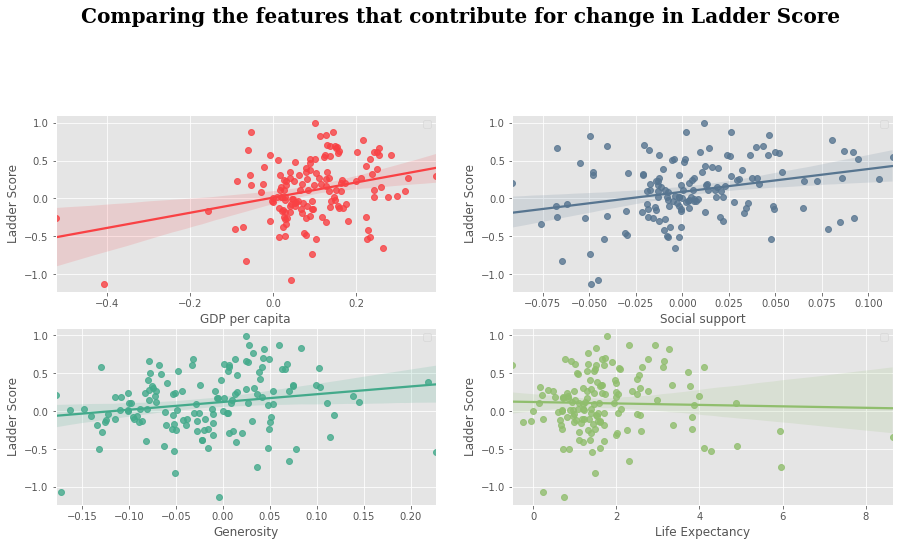

In [29]:
# Creating a dataset with all delta values

delta = final[['Country','Ladder Score','GDP per capita','Social support','Life Expectancy','Generosity']]

# Scatter plots for all continuous variables

cols=delta.corr()['Ladder Score'].sort_values(ascending=False)


fig=plt.figure(figsize=(15,15))
plt.suptitle("Comparing the features that contribute for change in Ladder Score",family='Serif', weight='bold', size=20)
j=0
for i in cols.index[1:]:
    
    ax=plt.subplot(421+j)
    ax=sns.regplot(data=delta, y='Ladder Score',x=i, color=color[-j])
    ax.legend('')
    j=j+1
    
plt.legend('')

GDP per capita, Social Support and Generosity positively impact the Ladder Score. This seems natural that a country with high GDP, sense of support among people and people wiiling to help others through charity will have a higher ladder score.
Of the three paramaters, GDP per capita seems to have the highest impact on Ladder Score.
Life expectancy on the other hand does not seem to have any impact on Ladder Score.

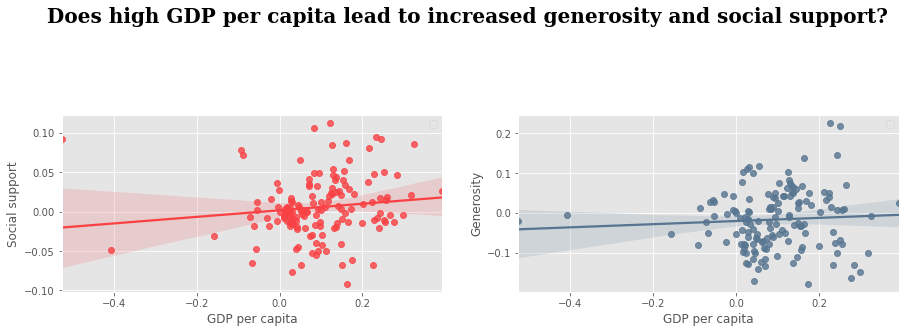

In [30]:
# Creating a dataset with all delta values

GDP = final[['Country','GDP per capita','Social support','Generosity']]

# Scatter plots for all continuous variables

cols=GDP.corr()['GDP per capita'].sort_values(ascending=False)


fig=plt.figure(figsize=(15,15))
plt.suptitle("Does high GDP per capita lead to increased generosity and social support?",family='Serif', weight='bold', size=20)
j=0
for i in cols.index[1:]:
    
    ax=plt.subplot(421+j)
    ax=sns.regplot(data=delta, x='GDP per capita',y=i, color=color[-j])
    ax.legend('')
    j=j+1
    
plt.legend('')

High GDP per capita does not necessarily mean people being more generous or feel they have support available. From the data at hand, we could not find any direct relation between GDP per capita and Social Support/Generosity.

## Conclusion:
1. In general, European and North American countries have a higher Ladder Score as compared to Asian/African countries.
2. The happiest and unhappiest countries pretty much remain the same in pre and post covid era, with countries interchanging spots in top 10 and bottom 10.
3. The distribution for Ladder Score is approximately normal.
4. Features that contributed to change in Ladder Score: 
  <br>  a. GDP Per Capita, Social Support, Generosity: Positive impact.
  <br>  b. Life Expectancy: Not so significant relation.
5. Finally, we concluded that higher GDP per capita does not lead to more generosity or availability of social support.

#### Sources
Datasets: https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report-2021.csv
          https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report.csv
          
Code for plots: https://www.kaggle.com/joshuaswords/awesome-eda-2021-happiness-population?scriptVersionId=59685514&cellId=36
               </br> https://www.kaggle.com/danielkorth/eda-world-happiness-report-2021-plotly